# Exploring population changes in Oregon

***************

In [366]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [367]:
current_districts = gp.read_file("./raw-data/current_map/district-shapes/POLYGON.shp")
acs_bg_shp = gp.read_file("./raw-data/or_race_2022_bg-acs_shp/or_race_2022_bg.shp")
bg_2020 = pd.read_csv("raw-data/or_pl2020_bg/or_pl2020_bg.csv")
bg_2020.GEOID=bg_2020.GEOID.str[9:]

current_districts = current_districts.to_crs(epsg=32610)
acs_bg_shp = acs_bg_shp.to_crs(epsg=32610)

In [368]:
bg = acs_bg_shp.merge(bg_2020, on='GEOID', how='left')

In [369]:
county = bg.dissolve(by='COUNTYFP', aggfunc = 'sum')

In [370]:
county['TOT_POP22'].sum()

4229374

In [371]:
county.shape

(36, 353)

In [372]:
county['2022_2020_pop_diff_tot'] = county['TOT_POP22'] - county['P0010001']
county['2022_2020_prop_pop_diff_tot'] = ((county['TOT_POP22'] / county['P0010001']) - 1)*100

In [373]:
county['2022_2020_prop_pop_diff_tot'].describe()

count    36.000000
mean      0.009575
std       0.687920
min      -3.032391
25%      -0.144884
50%      -0.031348
75%       0.301366
max       1.604278
Name: 2022_2020_prop_pop_diff_tot, dtype: float64

In [374]:
county['2022_2020_pop_diff_tot'].sum()

-7882

### Where is the population changing?

In [375]:
county[['COUNTY_x','2022_2020_prop_pop_diff_tot']].sort_values(by='2022_2020_prop_pop_diff_tot', ascending=False).head()

,COUNTY_x,2022_2020_prop_pop_diff_tot
COUNTYFP,,
055,Sherman CountySherman County,1.604278
013,Crook CountyCrook CountyCrook CountyCrook Coun...,1.006549
063,Wallowa CountyWallowa CountyWallowa CountyWall...,0.649439
031,Jefferson CountyJefferson CountyJefferson Coun...,0.640764
017,Deschutes CountyDeschutes CountyDeschutes Coun...,0.554342


/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/4200794841.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


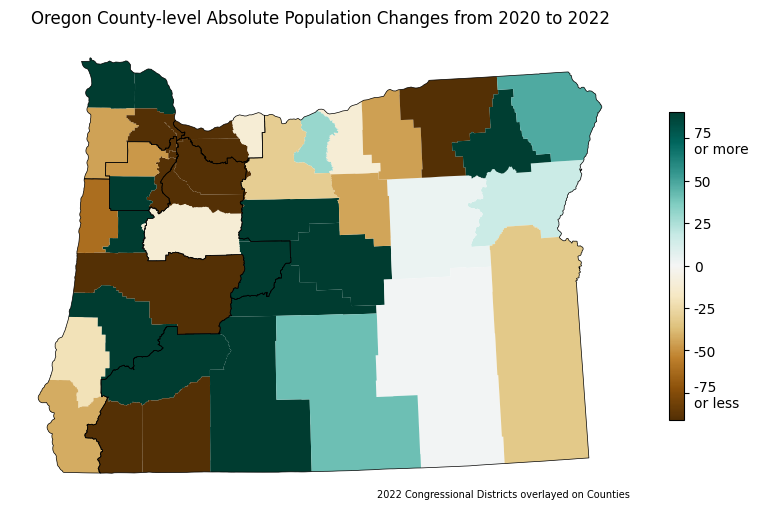

In [376]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

norm = mcolors.TwoSlopeNorm(vmin=-county['2022_2020_pop_diff_tot'].describe()['75%'],
                            vcenter=0., vmax=county['2022_2020_pop_diff_tot'].describe()['75%'])

county.plot(ax=ax, column='2022_2020_pop_diff_tot', legend=True, cmap='BrBG', norm=norm, legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon County-level Absolute Population Changes from 2020 to 2022', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
updated = ['{0:.0f}'.format(ytick) for ytick in yticks]
updated[1] += ' \nor less'
updated[-2] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/pop_change_2020_2022.png', dpi=1200, bbox_inches='tight')

/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/1847108335.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


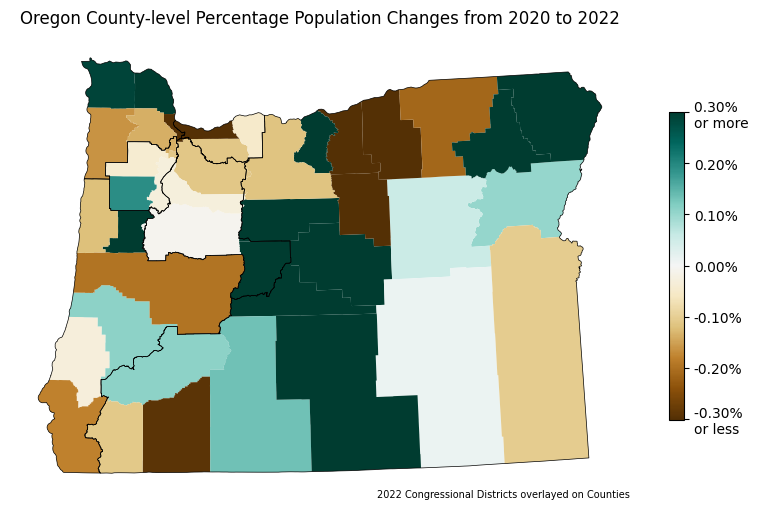

In [377]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

norm = mcolors.TwoSlopeNorm(vmin=-county['2022_2020_prop_pop_diff_tot'].describe()['75%'],
                            vcenter=0., vmax=county['2022_2020_prop_pop_diff_tot'].describe()['75%'])

county.plot(ax=ax, column='2022_2020_prop_pop_diff_tot', legend=True, cmap='BrBG', norm=norm, legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon County-level Percentage Population Changes from 2020 to 2022', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
updated = ['{0:.2f}%'.format(ytick) for ytick in yticks]
updated[1] += ' \nor less'
updated[-2] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/prop_pop_change_2020_2022.png', dpi=1200, bbox_inches='tight')

### Which demographic groups are growing?

Demographic fields

2020
- Total population Total P0020001
- Hispanic or Latino P0020002
- Not Hispanic or Latino P0020003
- White alone P0020005
- Black or African American alone P0020006
- American Indian and Alaska Native alone P0020007
- Asian alone P0020008
- Native Hawaiian and Other Pacific Islander alone P0020009
- Some other race alone P0020010
- Population of two or more races 

-------------------------

2022
- TOT_POP22  Total Population (sum of B03002_002E and B03002_012E)                               
- NHSP_POP22 Total Population (Not Hispanic/Latino) (B03002_002E)                                
- HSP_POP22  Total Population (Hispanic/Latino) (B03002_012E)                                    
- WHT_NHSP22 White Alone (Not Hispanic/Latino) (B03002_003E)                                     
- BLK_NHSP22 Black or African-American Alone (Not Hispanic/Latino) (B03002_004E)                 
- AIA_NHSP22 American Indian and Alaska Native Alone (Not Hispanic/Latino) (B03002_005E)         
- ASN_NHSP22 Asian Alone (Not Hispanic/Latino) (B03002_006E)                                     
- HPI_NHSP22 Native Hawaiian and Other Pacific Islander Alone (Not Hispanic/Latino) (B03002_007E)
- OTH_NHSP22 Some Other Race Alone (Not Hispanic/Latino) (B03002_008E)        

In [378]:
county['2022_2020_pop_diff_hsp'] = county['HSP_POP22'] - county['P0020002']
county['2022_2020_pop_diff_white'] = county['WHT_NHSP22'] - county['P0020005']
county['2022_2020_pop_diff_black'] = county['BLK_NHSP22'] - county['P0020006']
county['2022_2020_pop_diff_aia'] = county['AIA_NHSP22'] - county['P0020007']
county['2022_2020_pop_diff_asian'] = county['ASN_NHSP22'] - county['P0020008']
county['2022_2020_pop_diff_hpi'] = county['HPI_NHSP22'] - county['P0020009']
county['2022_2020_pop_diff_other'] = county['OTH_NHSP22'] - county['P0020010']
county['POC_POP22'] = (county['HSP_POP22'] + county['BLK_NHSP22'] + county['AIA_NHSP22'] + county['ASN_NHSP22'] + county['HPI_NHSP22'] + county['OTH_NHSP22'])
county['POC_POP20'] = (county['P0020002'] + county['P0020006'] + county['P0020007'] + county['P0020008'] + county['P0020009'] + county['P0020010'])
county['2022_2020_pop_diff_poc'] = (county['HSP_POP22'] + county['BLK_NHSP22'] + county['AIA_NHSP22'] + county['ASN_NHSP22'] + county['HPI_NHSP22'] + county['OTH_NHSP22']) - (county['P0020002'] + county['P0020006'] + county['P0020007'] + county['P0020008'] + county['P0020009'] + county['P0020010'])
county['2022_2020_prop_pop_diff_poc'] = (((county['HSP_POP22'] + county['BLK_NHSP22'] + county['AIA_NHSP22'] + county['ASN_NHSP22'] + county['HPI_NHSP22'] + county['OTH_NHSP22']) / (county['P0020002'] + county['P0020006'] + county['P0020007'] + county['P0020008'] + county['P0020009'] + county['P0020010'])) -1)*100

In [379]:
county['2022_2020_prop_pop_diff_poc'].describe()

count    36.000000
mean     -0.114409
std      11.319432
min     -22.814815
25%      -5.001413
50%      -3.332467
75%       1.692978
max      46.496815
Name: 2022_2020_prop_pop_diff_poc, dtype: float64

In [380]:
county[['2022_2020_prop_pop_diff_poc', 'POC_POP22', 'POC_POP20']].sort_values(by='2022_2020_prop_pop_diff_poc', ascending=False).head()

,2022_2020_prop_pop_diff_poc,POC_POP22,POC_POP20
COUNTYFP,,,
021,46.496815,230,157
063,23.703704,501,405
023,21.091811,488,403
001,8.957655,1338,1228
055,7.432432,159,148


/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/1016108211.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


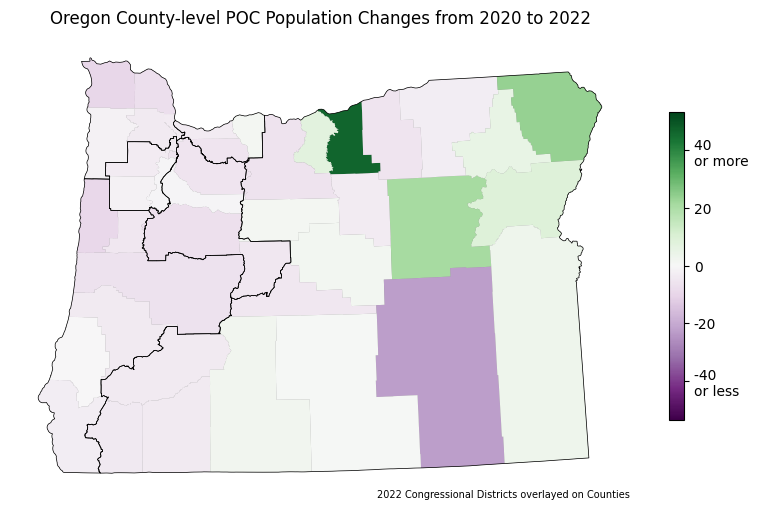

In [381]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

norm = mcolors.TwoSlopeNorm(vmin=-county['2022_2020_pop_diff_poc'].describe()['75%'],
                                vcenter=0., vmax=county['2022_2020_pop_diff_poc'].describe()['75%'])

county.plot(ax=ax, color='grey')
county.plot(ax=ax, column='2022_2020_prop_pop_diff_poc', legend=True, cmap='PRGn', norm=norm,
        legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon County-level POC Population Changes from 2020 to 2022', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
updated = ['{0:.0f}'.format(ytick) for ytick in yticks]
updated[1] += ' \nor less'
updated[-2] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/pop_change_poc_2020_2022.png', dpi=1200, bbox_inches='tight')

/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/2927128789.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


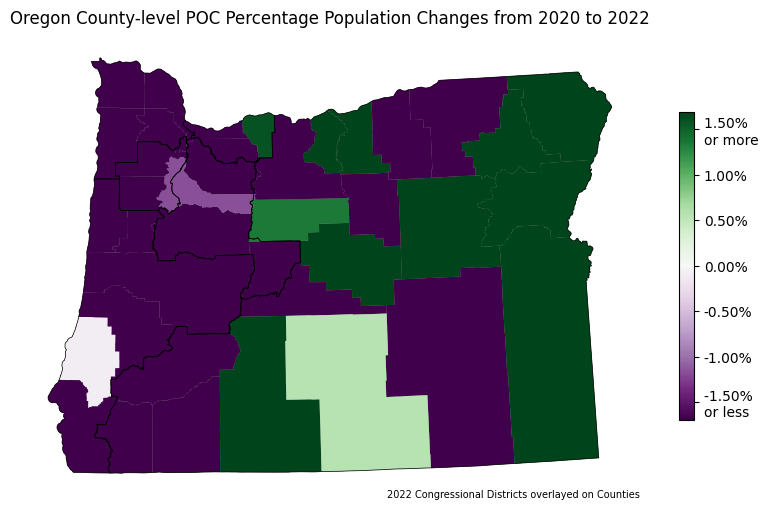

In [382]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

norm = mcolors.TwoSlopeNorm(vmin=-county['2022_2020_prop_pop_diff_poc'].describe()['75%'],
                                vcenter=0., vmax=county['2022_2020_prop_pop_diff_poc'].describe()['75%'])

county.plot(ax=ax, color='grey')
county.plot(ax=ax, column='2022_2020_prop_pop_diff_poc', legend=True, cmap='PRGn', norm=norm,
        legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon County-level POC Percentage Population Changes from 2020 to 2022', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
updated = ['{0:.2f}%'.format(ytick) for ytick in yticks]
updated[1] += ' \nor less'
updated[-2] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/prop_pop_change_poc_2020_2022.png', dpi=1200, bbox_inches='tight')

In [383]:
from pygris import counties

or_tiger = counties(state = "OR", cache=True)
multnomah = or_tiger[or_tiger['NAME'] == 'Multnomah']
multnomah = multnomah.to_crs(epsg=32610)

Using the default year of 2021
Using FIPS code '41' for input 'OR'


In [384]:
county[['COUNTY_x','2022_2020_prop_pop_diff_tot']].sort_values(by='2022_2020_prop_pop_diff_tot', ascending=False).head(3)

,COUNTY_x,2022_2020_prop_pop_diff_tot
COUNTYFP,,
055,Sherman CountySherman County,1.604278
013,Crook CountyCrook CountyCrook CountyCrook Coun...,1.006549
063,Wallowa CountyWallowa CountyWallowa CountyWall...,0.649439


In [385]:
county[['COUNTY_x','2022_2020_prop_pop_diff_tot']].sort_values(by='2022_2020_prop_pop_diff_tot', ascending=True).head(3)

,COUNTY_x,2022_2020_prop_pop_diff_tot
COUNTYFP,,
069,Wheeler CountyWheeler County,-3.032391
051,Multnomah CountyMultnomah CountyMultnomah Coun...,-0.898914
021,Gilliam CountyGilliam County,-0.601504


### What trend does 2030 projects show?

In [386]:
bg_proj = gp.read_file("./raw-data/or_bg_proj_P1_2020tiger_shp/or_bg_proj_P1_2020tiger.shp")
bg_proj = bg_proj.to_crs(epsg=32610)

In [387]:
bg_proj = bg_proj.dissolve(by='COUNTYFP20', aggfunc = 'sum')

In [388]:
bg_proj['2030_2022_pop_diff_tot'] = bg_proj['p30_total'] - bg_proj['p22_total']
bg_proj['2030_2022_prop_pop_diff_tot'] = ((bg_proj['p30_total'] / bg_proj['p22_total']) -1)*100

bg_proj['2030_2022_pop_diff_white'] = bg_proj['p30_white'] - bg_proj['p22_white']
bg_proj['2030_2022_pop_diff_black'] = bg_proj['p30_afam'] - bg_proj['p22_afam']
bg_proj['2030_2022_pop_diff_aia'] = bg_proj['p30_ai'] - bg_proj['p22_ai']
bg_proj['2030_2022_pop_diff_asian'] = bg_proj['p30_asian'] - bg_proj['p22_asian']
bg_proj['2030_2022_pop_diff_hpi'] = bg_proj['p30_pac'] - bg_proj['p22_pac']
bg_proj['2030_2022_pop_diff_other'] = bg_proj['p30_other'] - bg_proj['p22_other']
bg_proj['2030_2022_pop_diff_hisp'] = bg_proj['p30_hlo'] - bg_proj['p22_hlo']
bg_proj['2020_poc'] = (bg_proj['p20_afam'] + bg_proj['p20_ai'] + bg_proj['p20_asian'] + bg_proj['p20_pac'] + bg_proj['p20_other'] + bg_proj['p20_tom'])
bg_proj['2030_poc'] = (bg_proj['p30_afam'] + bg_proj['p30_ai'] + bg_proj['p30_asian'] + bg_proj['p30_pac'] + bg_proj['p30_other'] + bg_proj['p30_tom'])
bg_proj['2030_2022_pop_diff_poc'] = (bg_proj['p30_afam'] + bg_proj['p30_ai'] + bg_proj['p30_asian'] + bg_proj['p30_pac'] + bg_proj['p30_other'] + bg_proj['p30_tom']) - (bg_proj['p22_afam'] + bg_proj['p22_ai'] + bg_proj['p22_asian'] + bg_proj['p22_pac'] + bg_proj['p22_other'] + bg_proj['p22_tom'])
bg_proj['2030_2022_prop_pop_diff_poc'] = (((bg_proj['p30_afam'] + bg_proj['p30_ai'] + bg_proj['p30_asian'] + bg_proj['p30_pac'] + bg_proj['p30_other'] + bg_proj['p30_tom']) / (bg_proj['p22_afam'] + bg_proj['p22_ai'] + bg_proj['p22_asian'] + bg_proj['p22_pac'] + bg_proj['p22_other'] + bg_proj['p22_tom']))-1)*100

In [389]:
# population projected to increase almost 6% from 2022 to 2030
bg_proj['2030_2022_pop_diff_tot'].sum()/bg['TOT_POP22'].sum()

0.05702167743973458

In [390]:
bg_proj['2030_2022_pop_diff_poc'].sum() / bg_proj['2030_2022_pop_diff_tot'].sum()

0.4109949163646617

In [295]:
bg_proj['p30_hlo'].sum() /bg_proj['p30_total'].sum()

0.1449666207773655

In [294]:
bg_proj['2030_2022_pop_diff_hisp'].sum() /bg_proj['2030_2022_pop_diff_tot'].sum()

0.3526740917044691

In [237]:
bg_proj[[i for i in bg_proj.columns if 'pop_diff' in i]].sum()

2030_2022_pop_diff_tot         241166.000000
2030_2022_prop_pop_diff_tot       105.609267
2030_2022_pop_diff_white       142048.000000
2030_2022_pop_diff_black        12202.000000
2030_2022_pop_diff_aia          -1222.000000
2030_2022_pop_diff_asian        38374.000000
2030_2022_pop_diff_hpi           1430.000000
2030_2022_pop_diff_other       -23905.000000
2030_2022_pop_diff_poc          26879.000000
2030_2022_prop_pop_diff_poc       758.914395
dtype: float64

In [238]:
# about 12% of the projected population growth from 2022 to 2030 is estimated to be POC
bg_proj['2030_2022_pop_diff_poc'].sum()/bg_proj['2030_2022_pop_diff_tot'].sum()

0.11145435094499224

In [253]:
bg_proj['2030_2022_pop_diff_poc'].sum()

26879

In [254]:
bg_proj['2030_2022_pop_diff_tot'].sum()

241166

In [252]:
bg_proj['2030_2022_pop_diff_poc'].sum()/bg_proj['2030_2022_pop_diff_tot'].sum()

0.11145435094499224

/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/2666487708.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


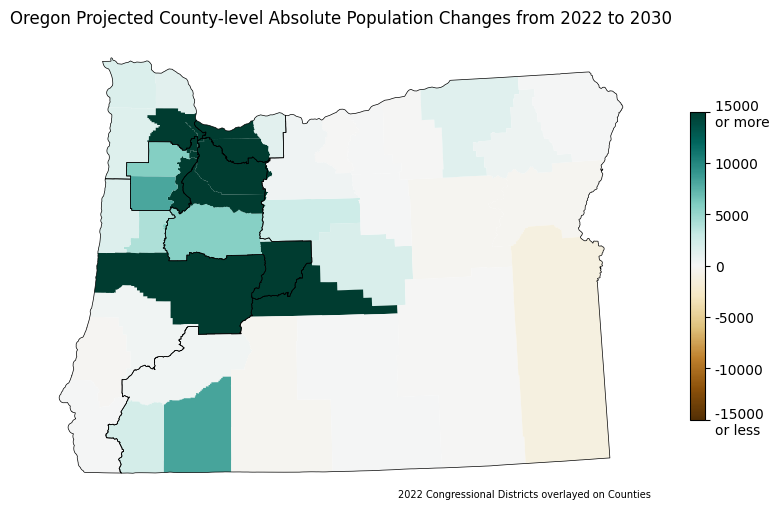

In [240]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

# n = mcolors.TwoSlopeNorm(vmin=bg_proj['2030_2022_pop_diff_poc'].min(),
#                             vcenter=0., vmax=bg_proj['2030_2022_pop_diff_poc'].max())
n = mcolors.TwoSlopeNorm(vmin=-15000, vcenter=0., vmax=15000)

bg_proj.plot(ax=ax, column='2030_2022_pop_diff_tot', legend=True, cmap='BrBG', norm=n, legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon Projected County-level Absolute Population Changes from 2022 to 2030', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
# yticks = [i for i in yticks if i > -bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%'] and i < bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%']]
updated = ['{0:.0f}'.format(ytick) for ytick in yticks]
updated[0] += ' \nor less'
updated[-1] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/pop_change_tot_2022_2023_projected.png', dpi=1200, bbox_inches='tight')

/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/593977479.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


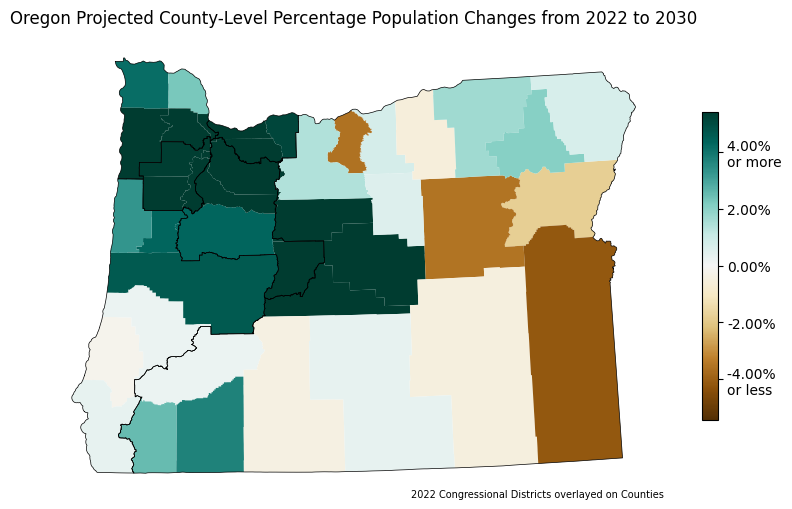

In [241]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

norm = mcolors.TwoSlopeNorm(vmin=-bg_proj['2030_2022_prop_pop_diff_tot'].describe()['75%'],
                            vcenter=0., vmax=bg_proj['2030_2022_prop_pop_diff_tot'].describe()['75%'])

bg_proj.plot(ax=ax, column='2030_2022_prop_pop_diff_tot', legend=True, cmap='BrBG', 
             norm=norm, legend_kwds={'shrink': 0.4, 'fmt': '{:.0f}'})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon Projected County-Level Percentage Population Changes from 2022 to 2030', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
updated = ['{0:.2f}%'.format(ytick) for ytick in yticks]
updated[1] += ' \nor less'
updated[-2] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/prop_pop_change_tot_2022_2023_projected.png', dpi=1200, bbox_inches='tight')

/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/2576917746.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


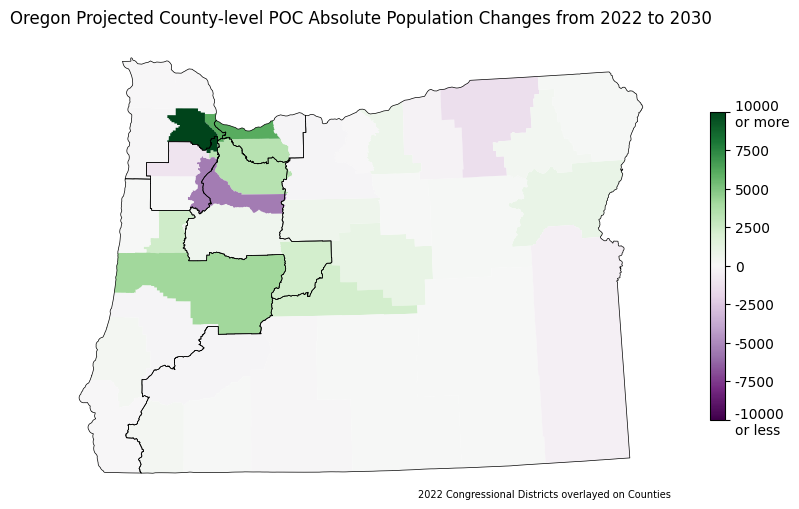

In [242]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

# n = mcolors.TwoSlopeNorm(vmin=bg_proj['2030_2022_pop_diff_poc'].min(),
#                             vcenter=0., vmax=bg_proj['2030_2022_pop_diff_poc'].max())
n = mcolors.TwoSlopeNorm(vmin=-10000, vcenter=0., vmax=10000)

bg_proj.plot(ax=ax, column='2030_2022_pop_diff_poc', legend=True, cmap='PRGn', norm=n, legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon Projected County-level POC Absolute Population Changes from 2022 to 2030', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
# yticks = [i for i in yticks if i > -bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%'] and i < bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%']]
updated = ['{0:.0f}'.format(ytick) for ytick in yticks]
updated[0] += ' \nor less'
updated[-1] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/pop_change_poc_2022_2023_projected.png', dpi=1200, bbox_inches='tight')

In [244]:
bg_proj[['2030_2022_pop_diff_poc', '2030_2022_prop_pop_diff_poc']].sort_values(by='2030_2022_prop_pop_diff_poc', ascending=False).head()

,2030_2022_pop_diff_poc,2030_2022_prop_pop_diff_poc
COUNTYFP20,,
021,691,377.595628
013,984,108.609272
001,931,101.637555
063,154,88.000000
023,132,82.500000


/var/folders/qc/7bpz4_qs0d1bhfr294bnmr_c0000gn/T/ipykernel_85769/2834575890.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colourbar.set_yticklabels(updated)


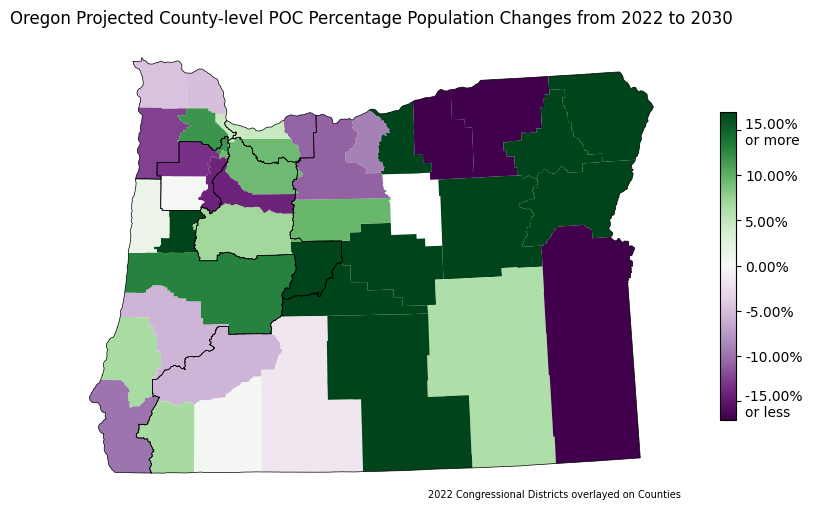

In [245]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)


norm = mcolors.TwoSlopeNorm(vmin=-bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%'],
                            vcenter=0., vmax=bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%'])

bg_proj.plot(ax=ax, column='2030_2022_prop_pop_diff_poc', legend=True, cmap='PRGn', norm=norm, legend_kwds={'shrink': 0.4})
current_districts.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)

ax.set_title('Oregon Projected County-level POC Percentage Population Changes from 2022 to 2030', fontsize=12, pad=10)

# Removes ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
ax.axis('off')

# update legend tick labels
colourbar = ax.get_figure().get_axes()[1]
yticks= colourbar.get_yticks()
# yticks = [i for i in yticks if i > -bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%'] and i < bg_proj['2030_2022_prop_pop_diff_poc'].describe()['75%']]
updated = ['{0:.2f}%'.format(ytick) for ytick in yticks]
updated[1] += ' \nor less'
updated[-2] += ' \nor more'
colourbar.set_yticklabels(updated)

ax.annotate('2022 Congressional Districts overlayed on Counties',
            xy = (1.0, 0),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=7)

plt.savefig('figs_county/prop_pop_change_poc_2022_2023_projected.png', dpi=1200, bbox_inches='tight')